# Decision Tree Classifier

---
>Note: Is done with original data. (NOT! normalized)

- **Structure**: A decision tree is a simple, interpretable structure that splits data based on certain conditions, forming a tree-like model of decisions. Each internal node represents a "test" on an attribute (e.g., whether the feature is greater than a threshold), each branch represents the outcome of the test, and each leaf node represents a class label.

- **How it works**: The decision tree uses measures like Gini impurity or information gain to decide the best way to split the data at each node. The goal is to create branches such that the dataset is divided into subsets that are as homogeneous as possible.

- **Advantages:**
    - Easy to understand and interpret, even for non-experts.
    - Requires less data preprocessing (e.g., no need for normalization).
    - Can handle both numerical and categorical data.
    
- **Disadvantages:**
    - Prone to overfitting, especially if the tree becomes very deep.
    - Sensitive to small variations in the data, leading to high variance.
    - Less accurate on unseen data compared to more sophisticated models.

`Suitable for simpler tasks, smaller datasets, or when model interpretability is essential.`


![Getting Started](..\data\raw\image.png)


---

In [30]:
# Data processing
# ==================================================================================
import pandas as pd
import numpy as np

# Charts
# ==================================================================================
import matplotlib.pyplot as plt

# Preprocessing and modeling
# ==================================================================================
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Warnings Configuration
# ==================================================================================
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore annoying warning (from sklearn and seaborn)

---

## Step 1: Decision making: Which is the best dataset



In [31]:
# Train data frames
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')

# Test data frames
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [32]:
# train_dicts (dict)
# =====================================================================================
train_dicts = {
  "X_train_with_outliers_sel": X_train_with_outliers_sel,
  "X_train_without_outliers_sel": X_train_without_outliers_sel
}

# test_dicts (dict)
# =====================================================================================
test_dicts = {
  "X_test_with_outliers_sel": X_test_with_outliers_sel,
  "X_test_without_outliers_sel": X_test_without_outliers_sel
}

# -.-.--.-.-.-.-.-.-.-.--.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.--.-.-.-.-.-.-

# train_dfs (list)
# =====================================================================================
train_dfs = [
  X_train_with_outliers_sel,
  X_train_without_outliers_sel
]

# test_dfs (list)
# =====================================================================================
test_dfs = [
  X_test_with_outliers_sel,
  X_test_without_outliers_sel
]

# -.-.--.-.-.-.-.-.-.-.--.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.--.-.-.-.-.-.-

# Print .shape
# =====================================================================================
print("|X_train|")
print("=================================================================")
print(f"X_train_with_outliers_sel shape: {X_train_with_outliers_sel.shape} ")
print(f"X_train_without_outliers_sel shape: {X_train_without_outliers_sel.shape}\n ")

print("|X_test|")
print("=================================================================")
print(f"X_test_with_outliers_sel shape: {X_test_with_outliers_sel.shape} ")
print(f"X_test_without_outliers_sel shape: {X_test_without_outliers_sel.shape}\n ")

print("|Y_train|")
print("=================================================================")
print(f"y_train shape: {y_train.shape}\n ")

print("|Y_test|")
print("=================================================================")
print(f"y_test shape: {y_test.shape} ")

|X_train|
X_train_with_outliers_sel shape: (614, 8) 
X_train_without_outliers_sel shape: (614, 8)
 
|X_test|
X_test_with_outliers_sel shape: (154, 8) 
X_test_without_outliers_sel shape: (154, 8)
 
|Y_train|
y_train shape: (614, 1)
 
|Y_test|
y_test shape: (154, 1) 


In [33]:
results = []

for df_index in range(len(train_dfs)):
  model = DecisionTreeClassifier(random_state = 42) # Model initialization and training

  train_df = train_dfs[df_index]
  model.fit(train_df, y_train)

  y_test_pred = model.predict(test_dfs[df_index]) # Model prediction

  results.append(
    {
        "index": df_index,
        "train_df": list(train_dicts.keys())[df_index],
        "Accuracy_score": accuracy_score(y_test, y_test_pred)
  })

resultados = sorted(results, key = lambda x: x["Accuracy_score"], reverse = True)
resultados

[{'index': 0,
  'train_df': 'X_train_with_outliers_sel',
  'Accuracy_score': 0.7467532467532467},
 {'index': 1,
  'train_df': 'X_train_without_outliers_sel',
  'Accuracy_score': 0.7402597402597403}]

In [34]:
print (f"The best train dataframe is |{resultados[0]['train_df']}|.\n\
=======================================================      \n\
| Accuracy score: {resultados[0]['Accuracy_score']}   |\n\
========================================")

The best train dataframe is |X_train_with_outliers_sel|.
| Accuracy score: 0.7467532467532467   |


---

## Step 2: Model hyperparameters optimization

- ### 2.1 Grid SearchCV

In [35]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(train_dfs[0], y_train)
y_pred = model.predict(test_dfs[0])

base_accuracy = accuracy_score(y_test, y_pred)
print(f" The base_accuracy is: {base_accuracy}")

 The base_accuracy is: 0.7467532467532467


In [36]:


# We define the parameters that we want to adjust by hand
hyperparams = {
    "criterion": ["entropy", "gini"], # 'gini' es generalmente más rápido, mientras que, 'entropy' puede ser preferible si se busca una medida basada en la información
    "max_depth": [8, 10, 12, 14, 16], # Significa que el árbol no tendrá más de 12 niveles. Valor mayor = complejo / Valor menor = simplificado.
    "random_state": [42], # To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer.
    "splitter": ["best", "random"], # The strategy used to choose the split at each node
        # 'best' (elige la mejor división) tiende a dar un rendimiento más alto 
        # & 
        # 'random' (elige una división aleatoria) puede ser más rápido y útil para modelos como Random Forest.
    "min_weight_fraction_leaf": [0.085, 0.09, 0.095, 0.1, 0.15, 0.2]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 8)
grid

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [8, 10, 12, 14, 16],
                         'min_weight_fraction_leaf': [0.085, 0.09, 0.095, 0.1,
                                                      0.15, 0.2],
                         'random_state': [42], 'splitter': ['best', 'random']},
             scoring='accuracy')

In [37]:
grid.fit(train_dfs[0], y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_weight_fraction_leaf': 0.09, 'random_state': 42, 'splitter': 'best'}


In [38]:
model_grid = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 8,
                                    min_weight_fraction_leaf = 0.09,
                                    random_state = 42,
                                    splitter = 'best')
model_grid.fit(train_dfs[1], y_train)

y_pred = model_grid.predict(test_dfs[1])

grid_accuracy = accuracy_score(y_test, y_pred)
print(f" The grid_accuracy is: {grid_accuracy}")

 The grid_accuracy is: 0.7727272727272727


In [39]:
print(f"We have an increment of {round(((grid_accuracy - base_accuracy)/base_accuracy)*100, 2)}%")

We have an increment of 3.48%


In [40]:
decision_tree = export_text(model_grid, feature_names = train_dfs[0].columns)
print(decision_tree)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- BMI <= 25.05
|   |   |   |   |--- class: 0
|   |   |   |--- BMI >  25.05
|   |   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- Glucose <= 100.50
|   |   |   |--- class: 0
|   |   |--- Glucose >  100.50
|   |   |   |--- class: 0
|--- Glucose >  127.50
|   |--- BMI <= 29.95
|   |   |--- class: 0
|   |--- BMI >  29.95
|   |   |--- Glucose <= 157.50
|   |   |   |--- class: 1
|   |   |--- Glucose >  157.50
|   |   |   |--- class: 1



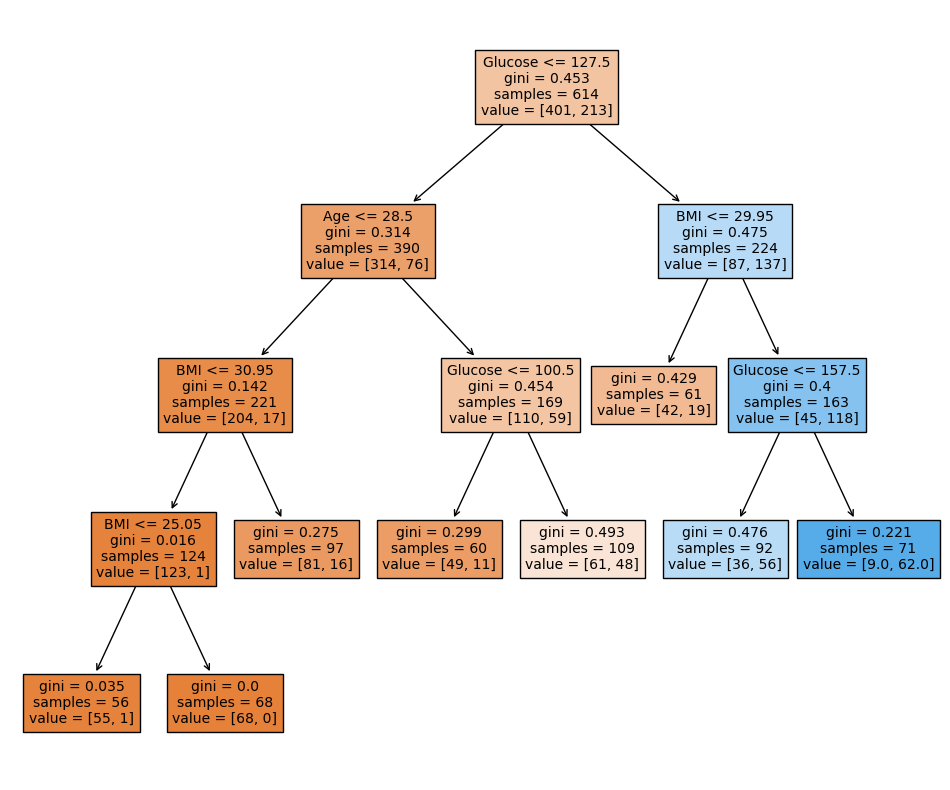

In [41]:
plt.figure(figsize=(12,10))

plot_tree(model_grid, 
            feature_names = train_dfs[0].columns, 
                filled = True
)

plt.show()